### import

In [1]:
import json
from chainer import serializers, datasets
from nets import CapsNet
import matplotlib.pyplot as plt

/Users/daisuke.motoki/.pyenv/versions/3.5.1/envs/chainer/lib/python3.5/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


### load datasets & model

In [2]:
import numpy as np
_, test = datasets.get_mnist(withlabel=True, ndim=3)
test = test[0:30]
test_batch = np.array([data[0] for data in test])
test_gt = np.array([data[1] for data in test])
capsnet= CapsNet()
serializers.load_npz("result/mnist/model_weights.npz", capsnet)

### predict results

In [3]:
activations = capsnet.predict(test_batch, layers=["digitcaps", "prob"])
gt_reconstructions = capsnet.reconstruct(activations["digitcaps"], test_gt)
predict_results = activations["prob"].data.argmax(axis=1)
pred_reconstructions = capsnet.reconstruct(activations["digitcaps"], predict_results)

In [4]:
import numpy as np
hoge = np.array([activations["prob"].data.argmax(axis=1), test_gt])
print(hoge)

[[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]]


### draw results

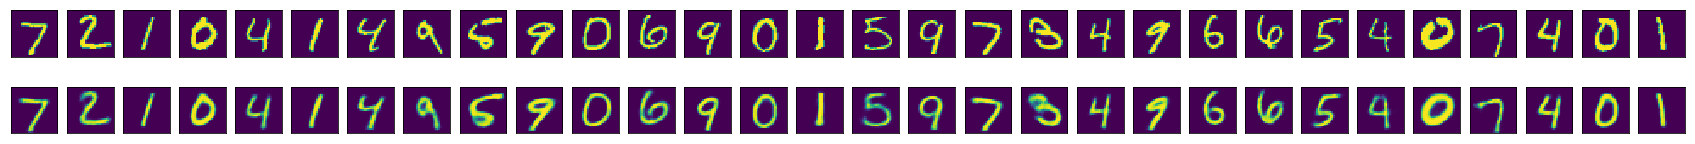

In [5]:
nplot = 30
figs = plt.figure(figsize=(30, 4))

for n in range(nplot):
    ax = figs.add_subplot(3, nplot, n+1)
    ax.imshow(test_batch[n].reshape((28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    ax = figs.add_subplot(3, nplot, nplot+n+1)
    gt_result = gt_reconstructions[n].array.reshape((28,28))
    ax.imshow(gt_result)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

### draw multi MNIST

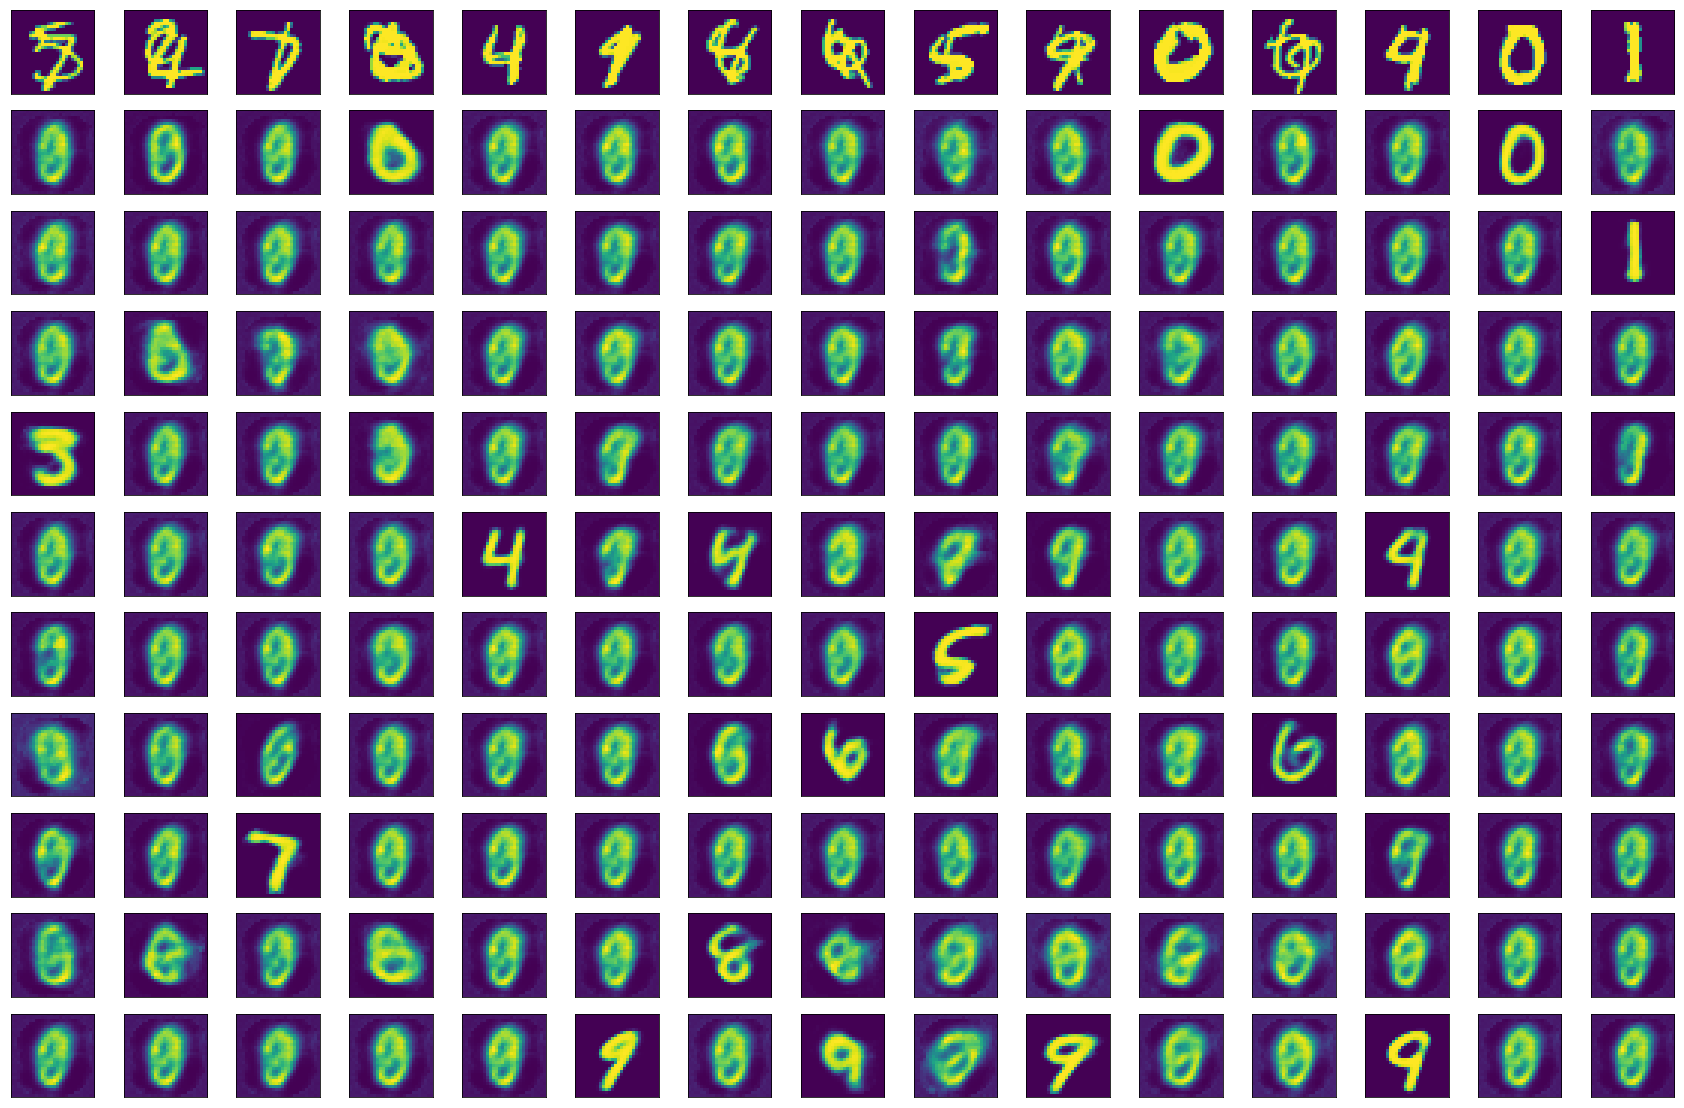

In [6]:
# make multi mnist
n_image = len(test)
multi_mnist = list()
multi_gt = list()
for i in range(int(n_image/2)):
    image = test_batch[i] + test_batch[i + int(n_image/2)]
    image[image > 1.0] = 1.0
    multi_mnist.append(image)
    multi_gt.append((test_gt[i], test_gt[i + int(n_image/2)]))
    
# predict 
activations = capsnet.predict(multi_mnist, layers=["digitcaps", "prob"])
results = list()
for i in range(10):
    result = capsnet.reconstruct(activations["digitcaps"], np.array([[i]*10]).T).array.reshape((-1, 28,28))
    results.append(result)

# plot results
nplot = int(n_image/2)
figs = plt.figure(figsize=(30, 20))

done = 1
for n in range(nplot):
    ax = figs.add_subplot(10+1, nplot, n+1)
    ax.imshow(multi_mnist[n].reshape((28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    done+=1
    
for i in range(10):
    for n in range(nplot):
        ax = figs.add_subplot(10+1, nplot, done)
        ax.imshow(results[i][n])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        done+=1
    
plt.show()

In [7]:
hoge = np.array([activations["prob"].data.argmax(axis=1), np.array(multi_gt)[:,0], np.array(multi_gt)[:,1]])
print(hoge)

[[3 8 7 0 4 9 8 6 5 9 0 6 9 0 1]
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
 [5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]]
